In [1]:
%matplotlib inline

import sys
sys.path.append('..')
import numpy as np
from utils.dataset_tools import (load_csv_to_df, dump_df_to_csv, make_train_test_set)
from model import apply_algo


path = '../data/'
filename = "dataset_lac.csv"

### Apply model

In [2]:
df_train = load_csv_to_df(path, filename)

In [3]:
df_train.shape

(8385444, 60)

In [4]:
df_train.columns.tolist()

['ident',
 'ict1',
 'bni',
 'datins',
 'datins0',
 'numpec',
 'cat_reg',
 'ale',
 'motins',
 'sexe',
 'depcom',
 'montant_indem',
 'duree_indem',
 'rome',
 'contrat',
 'h_trav',
 's_trav',
 'nreg',
 'bassin',
 'score_forma_diag',
 'age',
 'age_categ',
 'month',
 'year',
 'trim',
 'r1',
 'r23',
 'r34',
 'domaine_pro',
 'mobil',
 'benefrsa',
 'form2',
 'form1',
 'th',
 'qual2',
 'qual1',
 'motif',
 'exper_classe',
 'temps_plein',
 'nenf',
 'salaire',
 'resqpv',
 'dipl',
 'matrimon',
 'axetrav',
 'dep',
 'nreg_dep_recod',
 'dep_recod',
 'ale_recod',
 'sms',
 'mail',
 'isctp',
 'isentrep',
 'lag4_delta3_ict1_dep_rome_ratio',
 'lag4_delta3_ict1_dep_domaine_pro_ratio',
 'lag4_delta3_ict1_dep_rome_count',
 'lag12_ict1_dep_domaine_pro_ratio',
 'lag12_ident_dep_count',
 'lag1_domaine_pro_dep_ratio',
 'lag1_dep_domaine_pro_ratio']

In [4]:
year_test = 2017
month_test = 8
delta_train_set = 6

df_train, df_valid = make_train_test_set(df_train, year_test, month_test, delta_train_set)
df_train = df_train.replace([np.inf, -np.inf], np.nan).dropna()
df_valid = df_valid.replace([np.inf, -np.inf], np.nan).dropna()

In [5]:
df_train.shape, df_valid.shape

((870114, 60), (133577, 60))

In [6]:
df_train.numpec = df_train.numpec.astype(int) / 10
df_valid.numpec = df_valid.numpec.astype(int) / 10

In [10]:
df_train = df_train[df_train.domaine_pro != "B17"]
df_valid = df_valid[df_valid.domaine_pro != "B17"]

In [13]:
n_estimators = 500
max_depth = None
n_jobs = -1
graph = True

num_list = ['ict1',
            'age_categ',
            'numpec',
            'montant_indem',
            'duree_indem',
            'sms',
            'axetrav',
            'mail',
            'isctp',
            'isentrep',
            'h_trav',
            's_trav',
            'r23',
            'r34',
            'motif',
            'exper_classe',
            'nreg',
            'cat_reg',
            'month',
            'dep_recod',
            'nreg_dep_recod',
            'ale_recod',
            'salaire',
            'mobil',
            'form1',
            'qual2',
            'score_forma_diag',
            'benefrsa',
            'temps_plein',
            'dipl',
            'contrat',
            'th',
            'resqpv',
            'nenf',
            'matrimon',
            'lag4_delta3_ict1_dep_rome_ratio',
            'lag4_delta3_ict1_dep_domaine_pro_ratio',
            'lag4_delta3_ict1_dep_rome_count',
            'lag12_ict1_dep_domaine_pro_ratio',
            'lag12_ident_dep_count',
            'lag1_domaine_pro_dep_ratio',
            'lag1_dep_domaine_pro_ratio'  
           ]

cat_list = []


Done in min : 25.11747061808904

auc : 0.711310659057213
accuracy : 0.6541320736354312

Feature ranking:
1. feature 2 montant_indem (0.064474)
2. feature 20 ale_recod (0.059545)
3. feature 3 duree_indem (0.058267)
4. feature 36 lag4_delta3_ict1_dep_rome_count (0.050348)
5. feature 38 lag12_ident_dep_count (0.046835)
6. feature 34 lag4_delta3_ict1_dep_rome_ratio (0.046519)
7. feature 25 score_forma_diag (0.046352)
8. feature 37 lag12_ict1_dep_domaine_pro_ratio (0.045165)
9. feature 35 lag4_delta3_ict1_dep_domaine_pro_ratio (0.043032)
10. feature 21 salaire (0.039818)
11. feature 1 numpec (0.038389)
12. feature 18 dep_recod (0.037072)
13. feature 11 r23 (0.030656)
14. feature 12 r34 (0.029845)
15. feature 39 lag1_domaine_pro_dep_ratio (0.027505)
16. feature 9 h_trav (0.026103)
17. feature 19 nreg_dep_recod (0.025847)
18. feature 13 motif (0.025718)
19. feature 15 nreg (0.024002)
20. feature 17 month (0.023033)
21. feature 40 lag1_dep_domaine_pro_ratio (0.020113)
22. feature 5 axetrav (0

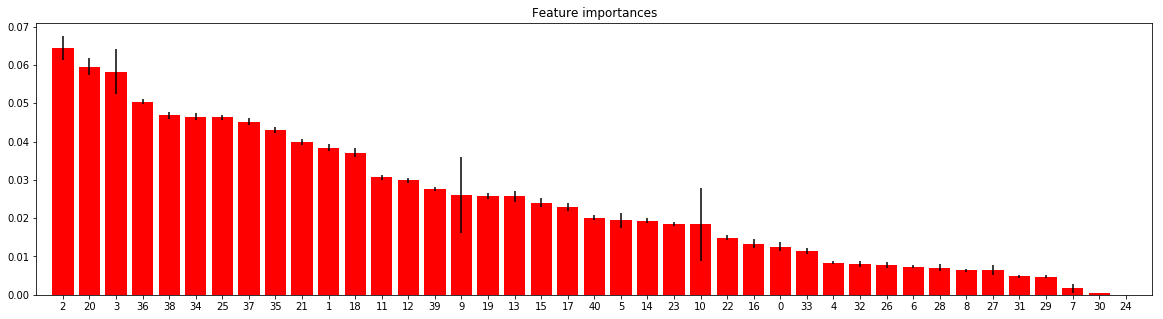

TypeError: 'NoneType' object is not iterable

In [14]:
auc, acc = apply_algo(n_estimators, max_depth, n_jobs, graph, num_list, cat_list, df_train, df_valid)

In [19]:
n_estimators = 500
max_depth = None
n_jobs = -1
graph = True

num_list = ['ict1',
            'montant_indem',
            'duree_indem',
            'cat_reg',
            'month',
            'dep_recod',
            'ale_recod',
            'salaire'
           ]

cat_list = []


Done in min : 8.738105853398642

auc : 0.5978252062953351
accuracy : 0.5685856756895695

Feature ranking:
1. feature 0 montant_indem (0.304611)
2. feature 5 ale_recod (0.191258)
3. feature 1 duree_indem (0.182473)
4. feature 4 dep_recod (0.124400)
5. feature 6 salaire (0.123016)
6. feature 3 month (0.053415)
7. feature 2 cat_reg (0.020828)


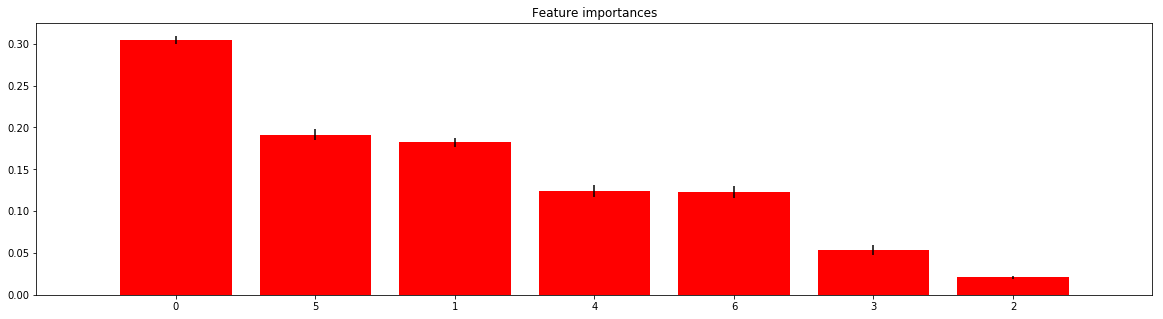

TypeError: 'NoneType' object is not iterable

In [20]:
auc, acc = apply_algo(200, max_depth, n_jobs, graph, num_list, cat_list, df_train, df_valid)


Done in min : 11.72334703207016

auc : 0.7319195796553779
accuracy : 0.6895289978436046

Feature ranking:
1. feature 10 ale_recod (0.067476)
2. feature 11 salaire (0.052179)
3. feature 16 score_forma_diag (0.047461)
4. feature 29 lag4_delta3_ict1_dep_rome_count (0.046472)
5. feature 27 lag4_delta3_ict1_dep_rome_ratio (0.045703)
6. feature 6 cat_stat (0.045390)
7. feature 31 lag1_ident_dep_domaine_pro_count (0.044369)
8. feature 33 lag12_ident_dep_count (0.041571)
9. feature 30 lag12_ict1_dep_domaine_pro_ratio (0.041325)
10. feature 3 motif (0.040099)
11. feature 28 lag4_delta3_ict1_dep_domaine_pro_ratio (0.040008)
12. feature 8 dep_recod (0.034022)
13. feature 2 r34 (0.027128)
14. feature 9 nreg_dep_recod (0.024732)
15. feature 5 nreg (0.023627)
16. feature 4 exper_classe (0.022777)
17. feature 1 r23 (0.022254)
18. feature 32 lag12_domaine_pro_dep_ratio (0.021346)
19. feature 34 lag1_domaine_pro_dep_ratio (0.021237)
20. feature 7 month (0.020101)
21. feature 15 der_sortie (0.019540)
2

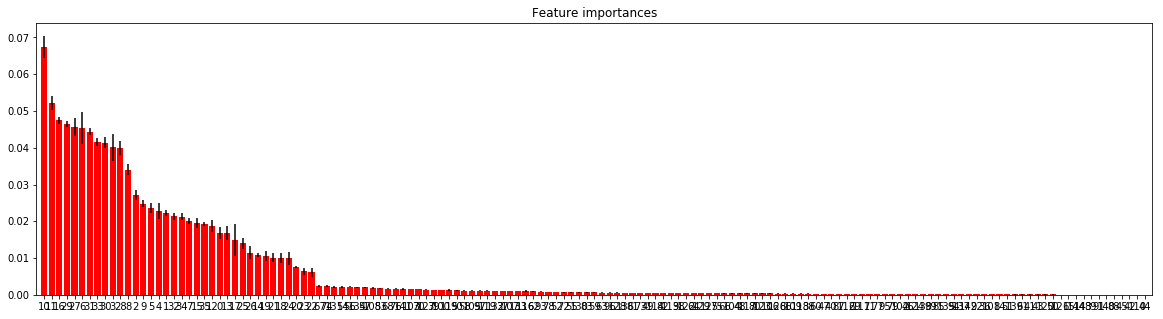

TypeError: 'NoneType' object is not iterable

In [27]:
auc, acc = apply_algo(n_estimators, max_depth, n_jobs, graph, num_list, cat_list, df_train, df_valid)


Done in min : 18.723638566335044

auc : 0.7341189149853091
accuracy : 0.6794742458046368

Feature ranking:
1. feature 10 ale_recod (0.066409)
2. feature 11 salaire (0.051551)
3. feature 6 cat_stat (0.047624)
4. feature 16 score_forma_diag (0.046680)
5. feature 29 lag4_delta3_ict1_dep_rome_count (0.046549)
6. feature 27 lag4_delta3_ict1_dep_rome_ratio (0.045748)
7. feature 31 lag1_ident_dep_domaine_pro_count (0.044965)
8. feature 33 lag12_ident_dep_count (0.043300)
9. feature 30 lag12_ict1_dep_domaine_pro_ratio (0.041808)
10. feature 28 lag4_delta3_ict1_dep_domaine_pro_ratio (0.040565)
11. feature 3 motif (0.038236)
12. feature 8 dep_recod (0.033763)
13. feature 2 r34 (0.026724)
14. feature 7 month (0.025804)
15. feature 9 nreg_dep_recod (0.024352)
16. feature 5 nreg (0.023065)
17. feature 4 exper_classe (0.022059)
18. feature 1 r23 (0.021961)
19. feature 32 lag12_domaine_pro_dep_ratio (0.021578)
20. feature 34 lag1_domaine_pro_dep_ratio (0.021325)
21. feature 35 lag1_dep_domaine_pro_r

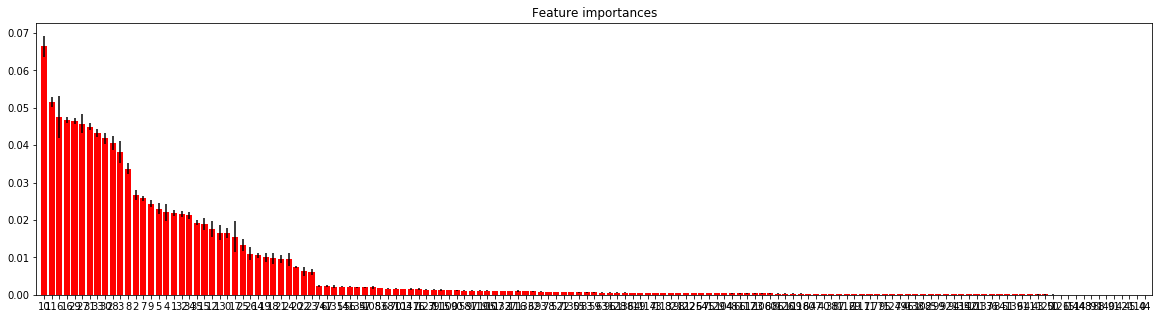

TypeError: 'NoneType' object is not iterable

In [32]:
auc, acc = apply_algo(n_estimators, max_depth, n_jobs, graph, num_list, cat_list, df_train, df_test)